<a href="https://colab.research.google.com/github/Segrey372017/gb_ML_in_business/blob/main/ssmirnov_ml_business_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix, classification_report, log_loss

# Домашняя работа к Уроку 6

### Задание 1
<p> Взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)</p>

### Набор данных с УСИ - Дефолт клиентов по кредитным картам (Тайвань)
Source:

Name: I-Cheng Yeh
email addresses: (1) icyeh '@' chu.edu.tw (2) 140910 '@' mail.tku.edu.tw
institutions: (1) Department of Information Management, Chung Hua University, Taiwan. (2) Department of Civil Engineering, Tamkang University, Taiwan.
other contact information: 886-2-26215656 ext. 3181

Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.


ссылка https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [33]:
DATA_LINK = 'https://raw.githubusercontent.com/Segrey372017/gb_ML_in_business/main/hw6_dataset_default_of_credit_card_clients.csv'

In [34]:
df = pd.read_csv(DATA_LINK, sep= ';')

In [35]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [37]:
df.isna().mean()

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
dtype: float64

In [38]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Как видно из описания данные уже прошли первичную обработку - категориальные переменные "оцифрованы", пропуски отсутсвуют. Набор данных был подготовлен для применения линейной регрессии, ожидаем что с более сложными моделями работать будет качественно

In [39]:
# Целевая переменная default payment next month
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Имеется дисбаланс классов, неразмеченных данных нет

In [40]:
imbalance = 23364/6636
imbalance

3.5207956600361663

### Задание 2
<p> Обучить любой классификатор (какой вам нравится) </p>

In [41]:
# делим набор данных на тренировочныую и тестовую выборки
y = df.pop('default payment next month') # отделяем целевую переменную

In [42]:
df.pop('ID') # выбрасываем столбец ID так как он дублирует индекс
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000


In [43]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, stratify = y, random_state = 12)

In [44]:
# инициализируем классификатор (Light Gradient Boosting)
lgbm_cls = LGBMClassifier(n_estimators = 80, reg_lambda= 0.2, class_weight= {0:imbalance, 1:1})

In [45]:
lgbm_cls.fit(X_train, y_train)

LGBMClassifier(class_weight={0: 3.5207956600361663, 1: 1}, n_estimators=80,
               reg_lambda=0.2)

In [46]:
y_pred_lgbm = lgbm_cls.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      4673
           1       0.77      0.13      0.22      1327

    accuracy                           0.80      6000
   macro avg       0.79      0.56      0.55      6000
weighted avg       0.79      0.80      0.74      6000



In [48]:
# Точность распознавания по обоим классам в районе 80%, однако из-за дисбаланса есть смещение в сторону 0 класса.
# F-score по целевому классу всего 22%

In [49]:
y_lgbm_proba = lgbm_cls.predict_proba(X_test)[:, 1]

In [50]:
 # подбор порога вероятностей

def get_treshold(y_test, y_score, b = 1):
    """
    Функция для подбора оптимального порога вероятности.
    Максимизирует F-score
    """

    precision, recall, thresholds = precision_recall_curve(y_test.values, y_score)
    fscore = (1 +b**2) * (precision * recall) / (b**2 * precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    # заодно расчитаем метрику ROC_AUC поскольку она в домашнем заднии
    auc = roc_auc_score(y_test, y_score)
    # отдадим в виде словаря порог вероятности и метрики
    return {'BestTreshold': thresholds[ix], 'Precision': precision[ix], 'Recall': recall[ix], 'ROC_AUC': auc, 'F-Score':fscore[ix]}

In [51]:
lgbm_results = get_treshold(y_test, y_lgbm_proba)

In [52]:
res_tab = pd.DataFrame(lgbm_results, index = ['LGBM_Classifier'])
res_tab

,BestTreshold,Precision,Recall,ROC_AUC,F-Score
LGBM_Classifier,0.118565,0.555725,0.548606,0.78377,0.552143


In [53]:
# Функциюя для отрисовки матрицы соответсвия
def show_matrix(y_true, y_pred, classes, title):
    """
    Отрисовка матрицы соответсвия средствами seaborn

    """
    plt.title(title)
    cnf = confusion_matrix(y_true, y_pred)
    
    sns.heatmap(cnf, cmap = 'Blues', annot = True, fmt = ".1f", linecolor= 'black',
                linewidths= 1, xticklabels= classes, yticklabels= classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    
    plt.figure(figsize = (8,8))
    plt.show()

    return

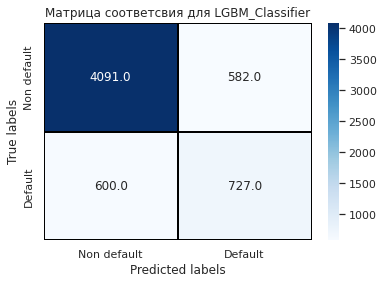

<Figure size 576x576 with 0 Axes>

In [54]:
show_matrix(y_test, y_lgbm_proba > lgbm_results['BestTreshold'],
            classes = ['Non default', 'Default'], title = 'Матрица соответсвия для LGBM_Classifier')

Классы оказались довольно трудноразделимыми, практически половина клиентов из 1 класса осталась не распознанной, recall - 55%

###Задание 3
<p> Разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные примеры (класс 1), а только лишь часть </p> 

In [121]:
X_train.shape

(24000, 23)

In [122]:
y_train.value_counts()

0    21013
1     2987
Name: default payment next month, dtype: int64

In [123]:
# возьмем положительные примеры из тренировочной выборки
PX = X_train.loc[y_train == 1]
PX.shape

(2987, 23)

### Задание 4 
<p> Применить random negative sampling для построения классификатора в новых условиях</p>

In [124]:
# возьмем выборку  положительных примеров
rnd = np.random.RandomState(42)

In [125]:
p_index = rnd.choice(PX.index, PX.shape[0] // 4, replace = False) # отберем случайным образом 25% от известных положительных случаев

In [126]:
p_index

array([ 5668, 19105,  8867,  3623,  2956, 22506, 23842, 28004, 14976,
       12278, 21913, 24218, 16025,  9918,  1457, 13531,  7314, 17236,
       12750, 14623, 22503, 29687, 20090,  5558, 17049, 21555,  9131,
       14410, 14914, 29657, 23030,  4852, 28229, 16000, 18009, 17821,
        7016,  8831,  4945, 25143, 21380, 16667,  9759, 14083,  7868,
       19569, 28681, 15302,  5457, 17516, 19283, 15513,  6530, 28016,
        1003, 28270, 25102,  5011, 14973,  3015,  7911, 27131,  8238,
       20774, 24263, 20672,  2752, 22152, 29408, 18443, 23225,  9566,
       12930, 11147, 12371, 22547, 29537, 11725, 11516, 15566, 19178,
        2991,  5912, 23752, 24478, 17862,  6483, 11622, 23148, 18099,
       29577, 16941,  4353,  6344, 27615, 21014, 22257, 20605, 14467,
        2616, 12128, 21958,  2776,  3304,  8947, 16578, 27361,  1538,
       25645, 29080,  3073, 27619,  1339, 12824,  6984, 22125, 19189,
        6581, 12281, 11519, 28490,  5561, 26826,  2641, 19039, 20622,
       14272,  8340,

In [127]:
# Возьмем выборку из примеров из отрицательных классов чтобы уравновесить набор 

In [128]:
NX = X_train.loc[y_train == 0]

In [129]:
n_index = rnd.choice(NX.index, PX.shape[0], replace = False)

In [130]:
n_index

array([22846, 22763, 18053, ...,  4288, 18104, 21656])

In [131]:
# пометим часть положительных примеров как негативным классом

In [132]:
y_train.loc[p_index] = 0

In [133]:
# сформируем сбалансированный тренировочный набор, положительные значение, значения помеченные нулевым классом, и заведомо нулевые
X_RNS = pd.concat([X_train.loc[PX.index], X_train.loc[n_index]])

In [134]:
X_RNS

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
29537,50000,1,2,1,49,0,0,0,0,0,...,50056,49735,14240,890,2313,2313,2082,677,890,14441
24261,200000,1,2,1,30,0,0,0,0,0,...,116355,117802,116296,60792,6000,6000,5000,6000,3000,1611
15316,420000,2,1,1,45,2,0,0,0,0,...,409078,412057,402926,373095,16272,17029,15514,15056,13707,14128
29338,30000,1,2,2,26,6,5,4,3,2,...,31624,30683,29215,29900,0,8,0,0,1015,1000
29885,50000,1,3,1,39,0,0,0,0,0,...,45697,46873,47188,48532,2000,2000,2000,2000,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6930,360000,2,1,2,35,1,-2,-2,-2,-2,...,0,0,0,1392,0,0,0,0,1392,12884
7789,250000,2,2,2,26,0,0,0,0,0,...,18852,24097,19152,1547,1500,1500,5645,500,1547,0
4288,100000,2,2,2,25,0,0,0,0,0,...,61956,63228,64561,66025,2197,2500,2300,2350,2540,4920
18104,280000,1,1,1,42,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# отберем соответсвующие метки классов
y_RNS = y_train.loc[X_RNS.index]

In [136]:
# проверим балансировку классов
y_RNS.value_counts()

0    3733
1    2241
Name: default payment next month, dtype: int64

Инициализируем классификатор

In [137]:
lgbm_RNS = LGBMClassifier(n_estimators = 80, reg_lambda= 0.2, class_weights =None)

In [138]:
lgbm_RNS.fit(X_RNS, y_RNS)

LGBMClassifier(class_weights=None, n_estimators=80, reg_lambda=0.2)

In [139]:
y_rns = lgbm_RNS.predict(X_test)

In [140]:
print(classification_report(y_test, y_rns))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4673
           1       0.57      0.42      0.49      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.67      0.68      6000
weighted avg       0.79      0.80      0.79      6000



In [141]:
y_rns_proba = lgbm_RNS.predict_proba(X_test)[:, 1]

In [142]:
rns_results = get_treshold(y_test, y_rns_proba)

### Задание 5 
<p> Сравнить качество с решением из пункта 3 (построить отчет - таблицу метрик)**Текст, выделенный полужирным шрифтом**</p>

In [145]:
res_tab = pd.DataFrame([lgbm_results, rns_results], index = ['LGBM_Classifier', 'RNS'])
res_tab

,BestTreshold,Precision,Recall,ROC_AUC,F-Score
LGBM_Classifier,0.118565,0.555725,0.548606,0.783770,0.552143
RNS,0.401820,0.445276,0.582517,0.755323,0.504734


RNS - оказался немного хуже притом, что для обучения было использовано лишь 5974 примера, причем только 2241 имели положительные метки